In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('sea_avg_multi.csv')
df.head()

df = df.sample(frac=1, random_state=20).reset_index(drop=True) #shuffle dataframe
df.head()

#Splitting in train and test
split = math.floor(df.shape[0]*0.2) #80-20% split
test = df.head(n=split)
train = df.drop(index=df.index[:split]).reset_index(drop=True)
print(train.shape)
print(test.shape)

(36, 4)
(9, 4)


In [3]:
#Splitting X and Y
y_train = train['Extent'].to_numpy()
y_test = test['Extent'].to_numpy()

X_train = train.drop(['Extent'],axis=1)
X_test = test.drop(['Extent'],axis=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36, 3) (9, 3) (36,) (9,)


In [4]:
degree = 3
col_list = X_train.columns

for i in range(2,degree+1):
    for col in col_list:
        new_degree = str(i)
        col_degree = col+'^'+new_degree
        X_train[col_degree] = X_train[col]**i

X_train.head()

,Year,Global CO2,Temp Diff From Average,Year^2,Global CO2^2,Temp Diff From Average^2,Year^3,Global CO2^3,Temp Diff From Average^3
0,1992,356.545833,0.22,3968064,127124.931267,0.0484,7904383488,4.532586e+07,0.010648
1,1995,360.968333,0.44,3980025,130298.137669,0.1936,7940149875,4.703350e+07,0.085184
2,2002,373.452500,0.62,4008004,139466.769756,0.3844,8024024008,5.208421e+07,0.238328
3,2020,414.238333,1.02,4080400,171593.396803,1.0404,8242408000,7.108056e+07,1.061208
4,1981,340.120000,0.32,3924361,115681.614400,0.1024,7774159141,3.934563e+07,0.032768


In [5]:
#Z normalisation
mu = np.mean(X_train,axis=0)
sigma = np.std(X_train,axis=0)
print(mu.shape, sigma.shape)

X_train = (X_train-mu)/sigma
print(X_train.head())
print(type(X_train))

#Adding column of 1 in X to multiply with theta0
X_zero = np.ones((X_train.shape[0],1))
X_train = np.hstack((X_zero,X_train))
print(X_train.shape)
print(type(X_train))

(9,) (9,)
       Year  Global CO2  Temp Diff From Average    Year^2  Global CO2^2  \
0 -0.762153   -0.794758               -1.316136 -0.763455     -0.798783   
1 -0.514969   -0.603035               -0.408930 -0.517217     -0.616968   
2  0.061796   -0.061825                0.333329  0.058778     -0.091635   
3  1.544906    1.706310                1.982794  1.549173      1.749116   
4 -1.668498   -1.506846               -0.903769 -1.663156     -1.454448   

   Temp Diff From Average^2    Year^3  Global CO2^3  Temp Diff From Average^3  
0                 -1.056393 -0.764737     -0.801014                 -0.840268  
1                 -0.546981 -0.519451     -0.629158                 -0.584861  
2                  0.122412  0.055758     -0.120855                 -0.060095  
3                  2.423889  1.553436      1.790935                  2.759604  
4                 -0.866942 -1.657817     -1.402864                 -0.764471  
<class 'pandas.core.frame.DataFrame'>
(36, 10)
<class 'nump

In [10]:
class polyLinearRegression:
    def __init__(self):
        print("Regressor created")
        
    def predict(self, X,theta):
        return np.dot(X,theta)

    def error(self, X,y,theta):
        m = X.shape[0]
        e = 0.0
        y_hat = self.predict(X,theta)
        e = (np.sum((y-y_hat)**2))/m
        
        return e

    def r2_score(self, X,y):
        y_hat = self.predict(X,theta)
        num = np.sum((y-y_hat)**2)
        denom = np.sum((y-y.mean())**2)
        score = (1-num/denom)
        
        return score*100

    def gradient(self, X,y,theta):
        m = X.shape[0]
        y_hat = self.predict(X,theta)
        grad = (np.dot(X.T,(y_hat-y)))/m
        
        return grad

    def fit(self, X,y,learning_rate=0.05,max_epochs=100):
        n = X.shape[1]
        theta = np.zeros((n,))
        error_list = []

        for i in range(max_epochs):
            e = self.error(X,y,theta)
            error_list.append(e)

            grad = self.gradient(X,y,theta)
            theta = theta - learning_rate*grad

        return theta,error_list

    def test_preprocess(self, X,degree):
        col_list = X.columns

        for i in range(2,degree+1):
            for col in col_list:
                new_degree = str(i)
                col_degree = col+'^'+new_degree
                X[col_degree] = X[col]**i
        
        X = (X-mu)/sigma
        X_zero = np.ones((X.shape[0],1))
        X = np.hstack((X_zero,X))
        
        return X

In [11]:
learning_rate = 0.1
epochs = 200
model = polyLinearRegression()
theta, error_list = model.fit(X_train,y_train,learning_rate,epochs)

Regressor created


In [12]:
print("Learned weights are: ",theta)

Learned weights are:  [ 1.12932724e+01 -1.06020550e-01 -5.39877480e-02 -1.22446717e-01
 -1.04282625e-01 -2.67670202e-02 -9.01372514e-02 -1.02526803e-01
  2.19955998e-03 -3.27245298e-02]


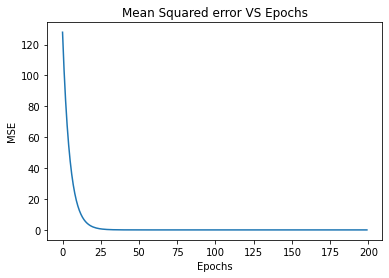

In [15]:
#Plotting error
plt.plot(error_list)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Mean Squared error VS Epochs')
plt.show()

In [14]:
#Evaluation on test set
degree=3
X_test = model.test_preprocess(X_test,degree)
print("MSE on test set is: ",model.error(X_test,y_test,theta))
print("R^2 score on test is: ",model.r2_score(X_test,y_test))

MSE on test set is:  0.03574176984598722
R^2 score on test is:  94.90370758905571
